<a href="https://colab.research.google.com/github/Abishethvarman/ML-Models/blob/main/Saroth_NFR_SVN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of S/W NFR in 3 class
##  SVN for 3 classes
Product - 0
Process - 1
External - 2

Product-Related (P):
  Look & Feel (LF)
  Performance (PE)
  Portability (PO)
  Security (SE)
  Usability (US)

Process-Related (PR):
  Maintainability (MN)
  Scalability (SC)
  
External-Related (ER):
  Availability (A)
  Fault Tolerance (FT)
  Legal (L)
  Operational (O)

---

The data set : https://drive.google.com/file/d/1lO_bTNM227omNaQ8xR0KmYZsaSmlmFOQ/view?usp=drive_link

---

In [8]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from nltk import download
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("stopwords")
download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [3]:
%cd /mydrive/dataset/

/content/gdrive/My Drive/dataset


In [10]:
data = pd.read_csv("Saroth_DS_2.csv", encoding='iso-8859-1')

In [11]:
data

,Type,Requirement
0,A,The product shall be available during normal ...
1,A,The product shall adhere to the corporate onli...
2,A,The product shall achieve a 98% uptime. The pr...
3,A,Aside from server failure the software produ...
4,A,The website shall be available for use 24 hou...
...,...,...
1279,PO,The system shall be reliably used on any devic...
1280,MN,The system shall be scalable and able to handl...
1281,PO,The system shall be compatible with all operat...
1282,PE,The systems classification process shall be d...


In [14]:
data['Type'] = data['Type'].replace({
    'LF': 0,
    'PE': 0,
    'PO': 0,
    'SE': 0,
    'US': 0,
    'MN': 1,
    'SC': 1,
    'A': 2,
    'FT': 2,
    'L': 2,
    'O': 2
})


In [18]:
data

,Type,Requirement
0,2,The product shall be available during normal ...
1,2,The product shall adhere to the corporate onli...
2,2,The product shall achieve a 98% uptime. The pr...
3,2,Aside from server failure the software produ...
4,2,The website shall be available for use 24 hou...
...,...,...
1279,0,The system shall be reliably used on any devic...
1280,1,The system shall be scalable and able to handl...
1281,0,The system shall be compatible with all operat...
1282,0,The systems classification process shall be d...


In [22]:
# Preprocessing
def preprocess(text):
    stop_words = stopwords.words('english')
    stop_words.extend(['shall'])

    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() != 'mor']
    return ' '.join(filtered_words)

In [42]:
# # Apply preprocessing to the text data
# data['clean'] = data['Requirement'].apply(preprocess)

In [24]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess(text):
    if isinstance(text, str):
        stop_words = set(stopwords.words('english'))
        stop_words.add('shall')

        words = word_tokenize(text)
        filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() != 'mor']
        return ' '.join(filtered_words)
    else:
        return ''


data['clean'] = data['Requirement'].apply(lambda x: preprocess(x) if pd.notna(x) else '')


In [27]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data['clean'], data['Type'], test_size=0.2)

In [34]:
# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Choose an appropriate number of features
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [35]:
linear_svm_model = LinearSVC(max_iter=10000)

In [36]:
# ithu thevala Saroth
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_vectorized, y_train)

SVC(kernel='linear')

In [37]:
linear_svm_model.fit(x_train_vectorized, y_train)


LinearSVC(max_iter=10000)

In [38]:
linear_svm_predictions = linear_svm_model.predict(x_test_vectorized)


In [39]:
linear_svm_accuracy = accuracy_score(y_test, linear_svm_predictions)
print("Linear SVM Model Accuracy:", linear_svm_accuracy)

Linear SVM Model Accuracy: 0.8988326848249028


In [40]:
linear_svm_precision = precision_score(y_test, linear_svm_predictions, average='weighted')
linear_svm_recall = recall_score(y_test, linear_svm_predictions, average='weighted')
linear_svm_f1 = f1_score(y_test, linear_svm_predictions, average='weighted')

print("Linear SVM Precision:", linear_svm_precision)
print("Linear SVM Recall:", linear_svm_recall)
print("Linear SVM F1 Score:", linear_svm_f1)

Linear SVM Precision: 0.9007288670839677
Linear SVM Recall: 0.8988326848249028
Linear SVM F1 Score: 0.8962595286374538


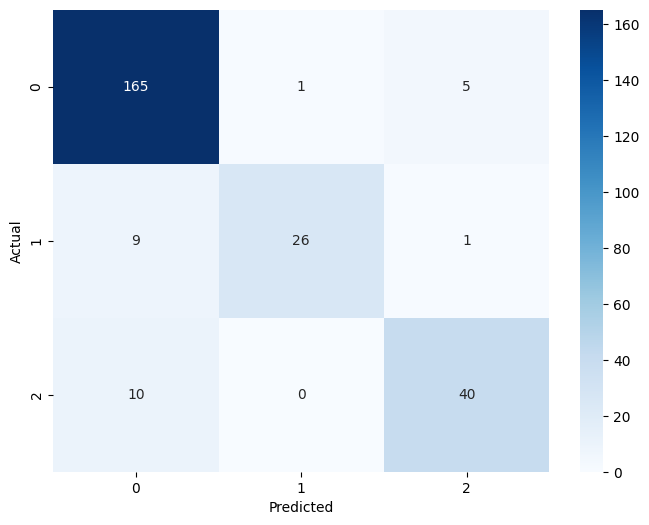

In [41]:
linear_svm_cm = confusion_matrix(y_test, linear_svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(linear_svm_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()